Необходимо проанализировать и визуализировать результаты, провести сегментацию, а также сделать выводы и сформулировать рекомендации для дальнейших запусков АБ Теста.Также надо построить таблицу, которая будет в удобной форме хранить результаты АБ Теста.

In [754]:
import pandas as pd
from scipy.stats import pearsonr, spearmanr, mannwhitneyu
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import numpy as np


Импорт и анализ таблиц

In [755]:
# Импортируем данные

In [756]:
df = 'c:/Users/Новый пользователь/Desktop/Учеба/Диплом.Елгазинов.А.А.xlsx'

excel_data = pd.read_excel(df, sheet_name=None)



In [757]:
data_df = excel_data['Данные']
clients_df = excel_data['Clients']
df_region_dict = excel_data['Region_dict']

In [758]:
#Изучаем все три таблицы и проверяем их на наличие пустых значений

In [759]:
data_df.head(800)
# clients_df.head()
# df_region_dict.head(800)

,id_order,id_client,amt_payment,dtime_pay
0,100238,194569.0,5373.0,2022-10-28 04:05:15.221000
1,100242,191056.0,4151.0,2022-08-01 02:42:54.992000
2,100249,200049.0,5688.0,2022-08-24 12:45:12.744000
3,100258,206161.0,4330.0,2022-12-09 15:13:26.437000
4,100267,190945.0,5488.0,2022-08-03 02:07:31.468000
...,...,...,...,...
795,104199,194783.0,1939.0,2022-09-29 06:49:16.027000
796,104202,183666.0,6640.0,2022-08-02 03:58:05.038000
797,104210,197935.0,5681.0,2022-08-02 16:22:23.055000
798,104214,182560.0,4346.0,2022-08-20 13:52:55.619000


In [760]:
data_df.describe()
# clients_df.describe()
# df_region_dict.describe()

,id_order,id_client,amt_payment
count,37989.000000,37401.000000,35845.000000
mean,197751.747085,194078.460710,3542.546464
std,56733.647764,8972.581221,1426.815593
min,100238.000000,178561.000000,498.000000
25%,148504.000000,186334.000000,2582.000000
50%,197658.000000,194069.000000,3470.000000
75%,246441.000000,201831.000000,4389.000000
max,297607.000000,209634.000000,7633.000000


In [761]:
df_region_dict.info()
# df_data.info()
# df_clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id_trading_point  66 non-null     int64 
 1   city              66 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.2+ KB


In [762]:
# Исключаем из таблиц все строки, в которых есть нулловые значения

In [763]:
df_clients=clients_df.dropna()
df_data=data_df.dropna()


In [764]:
df_region_dict.info()
# df_data.info()
# df_clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id_trading_point  66 non-null     int64 
 1   city              66 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.2+ KB


In [765]:
# df_region_dict.head()
df_data.head()
# df_clients.head()

,id_order,id_client,amt_payment,dtime_pay
0,100238,194569.0,5373.0,2022-10-28 04:05:15.221000
1,100242,191056.0,4151.0,2022-08-01 02:42:54.992000
2,100249,200049.0,5688.0,2022-08-24 12:45:12.744000
3,100258,206161.0,4330.0,2022-12-09 15:13:26.437000
4,100267,190945.0,5488.0,2022-08-03 02:07:31.468000


In [766]:
# Исследуем количество торговых точек в каждом городе - стороим группировку по количеству в каждом городе и визуализируем с помощью гистограммы.

In [767]:
df_count = df_region_dict.groupby('city').agg(cnt = ('id_trading_point', 'count')).reset_index().sort_values(by = 'cnt', ascending = False)
df_count.head()

,city,cnt
15,Санкт-Петербург,11
7,Москва,11
4,Казань,6
10,Новосибирск,6
6,Красноярск,5


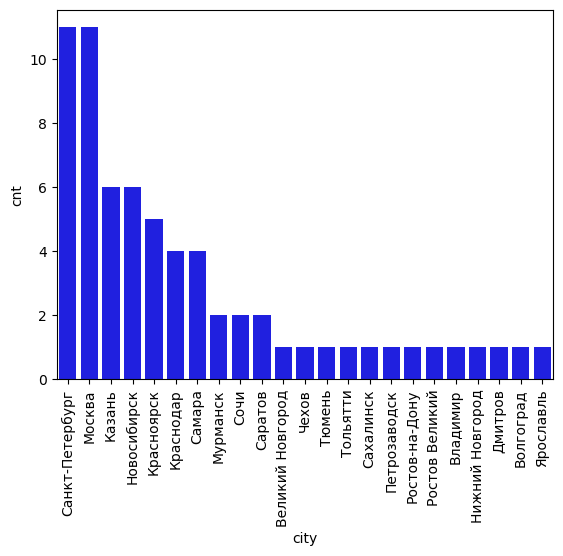

In [768]:
sns.barplot(x=df_count['city'],y=df_count['cnt'],color="blue")
plt.xticks(rotation=90)
plt.show()

Объединение таблиц

In [769]:
# Строим агрегацию таблицы с платежами, где вычисляем сумму платежей на каждого клиента.

In [770]:
df_pay = df_data.groupby('id_client').agg(sum= ('amt_payment','sum')).reset_index()
df_pay

,id_client,sum
0,178561.0,3052.0
1,178562.0,2439.0
2,178563.0,768.0
3,178565.0,958.0
4,178566.0,5474.0
...,...,...
28595,209630.0,6927.0
28596,209631.0,2090.0
28597,209632.0,2775.0
28598,209633.0,1673.0


In [771]:
# Соединяем (по клиенту) сгруппированную таблицу с платежами с клиентской таблицей. Убеждаемся, что в таблице остались все клиенты из клиентской таблицы

In [772]:
df_pays=pd.merge(df_clients,df_pay,
        how = 'left',
	    left_on = 'id_client', right_on = 'id_client')
df_pays.head()

,id_client,dtime_ad,nflag_test,id_trading_point,sum
0,180844,2022-06-08 18:38:41.414,0,212,5349.0
1,226069,2022-07-11 16:28:38.511,1,54,NaN
2,183981,2022-06-16 12:23:59.289,1,991,6322.0
3,322530,2022-07-08 08:56:08.714,0,1015,NaN
4,254313,2022-06-19 22:18:01.770,1,453,NaN


In [773]:
#  Заполняем нулями суммы покупок тех клиентов, которые их не совершали

In [774]:
df_pays['sum'] = df_pays['sum'].fillna(0)
df_pays.head()

,id_client,dtime_ad,nflag_test,id_trading_point,sum
0,180844,2022-06-08 18:38:41.414,0,212,5349.0
1,226069,2022-07-11 16:28:38.511,1,54,0.0
2,183981,2022-06-16 12:23:59.289,1,991,6322.0
3,322530,2022-07-08 08:56:08.714,0,1015,0.0
4,254313,2022-06-19 22:18:01.770,1,453,0.0


In [775]:
# С помощью словаря регионов подтянули к каждой торговой точке город, в котором она находится.

In [776]:
df_pays1=pd.merge(df_pays,df_region_dict,
        how = 'left',
	    left_on = 'id_trading_point', right_on = 'id_trading_point')
df_pays1.head()

,id_client,dtime_ad,nflag_test,id_trading_point,sum,city
0,180844,2022-06-08 18:38:41.414,0,212,5349.0,Красноярск
1,226069,2022-07-11 16:28:38.511,1,54,0.0,Мурманск
2,183981,2022-06-16 12:23:59.289,1,991,6322.0,Казань
3,322530,2022-07-08 08:56:08.714,0,1015,0.0,Краснодар
4,254313,2022-06-19 22:18:01.770,1,453,0.0,Санкт-Петербург


In [777]:
#  Создаем поле флаг платежа, который принимает значения 0 или 1 в зависимости от того, заплатил клиент или нет.

In [778]:
df_pays1['payment_flag'] = df_pays1['sum'].apply(lambda x:1 if x > 0 else 0)

df_pays1.head()

,id_client,dtime_ad,nflag_test,id_trading_point,sum,city,payment_flag
0,180844,2022-06-08 18:38:41.414,0,212,5349.0,Красноярск,1
1,226069,2022-07-11 16:28:38.511,1,54,0.0,Мурманск,0
2,183981,2022-06-16 12:23:59.289,1,991,6322.0,Казань,1
3,322530,2022-07-08 08:56:08.714,0,1015,0.0,Краснодар,0
4,254313,2022-06-19 22:18:01.770,1,453,0.0,Санкт-Петербург,0


In [779]:
df_pays1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55356 entries, 0 to 55355
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id_client         55356 non-null  int64         
 1   dtime_ad          55356 non-null  datetime64[ns]
 2   nflag_test        55356 non-null  int64         
 3   id_trading_point  55356 non-null  int64         
 4   sum               55356 non-null  float64       
 5   city              55356 non-null  object        
 6   payment_flag      55356 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 3.4+ MB


Автоматизация статистических вычислений

In [780]:
#  Создаем функцию test_calc

In [781]:
def test_calc(r1, r2, alpha = 0.05):
    
    s,p = ttest_ind(r1,r2)
    
    if p < alpha:
        print("Гипотеза H0 не подтверждается: средние не равны")
    else:
        print("Гипотеза H0 подтверждается: средние равны")
    
    print("Среднее значение 1 ряда", r1.mean())
    print("Среднее значение 2 ряда", r2.mean())
    print("Разница средних = ", r1.mean()-r2.mean())
    print("P_value = ",p)
    return s, p

In [782]:
#  Создаем функцию mann_whitney_func

In [783]:
def mann_whitney_func(r1, r2, alpha=.05):
    
    s, p =  mannwhitneyu(r1, r2)
    if p < alpha:
        print('Распределения не равны')
    else:
        print('Распределения равны')
    
    print("P_value = ",p)
    return s, p

Чистка неверно заполненных точек

In [784]:
# Создаем пустой список. Запускаем цикл по всем торговым точкам и добавляем к этому списку все торговые точки, в которых не было заплачено ни одного рубля ни одним клиентом и в которых пустует или контрольная, или тестовая группа.

In [785]:
zero=[]
for i in df_pays1['id_trading_point'].unique():
    # print(i)  
    sum_contrl=df_pays1[(df_pays1['id_trading_point']==i)&(df_pays1['nflag_test']==0)]['sum'].sum()
    sum_test=df_pays1[(df_pays1['id_trading_point']==i)&(df_pays1['nflag_test']==1)]['sum'].sum()
    # print(sum_contrl,sum_test)
    if (sum_contrl==0)|(sum_test==0):
        zero.append(i)



    

In [786]:
#В цикле выше прошлись по всем торговым точкам и добавили к этому списку все торговые точки, в которых пустует или контрольная, или тестовая группа.

In [787]:
df_paymentall=df_pays1[~(df_pays1['id_trading_point'].isin(zero))]
df_paymentall


,id_client,dtime_ad,nflag_test,id_trading_point,sum,city,payment_flag
0,180844,2022-06-08 18:38:41.414,0,212,5349.0,Красноярск,1
1,226069,2022-07-11 16:28:38.511,1,54,0.0,Мурманск,0
2,183981,2022-06-16 12:23:59.289,1,991,6322.0,Казань,1
4,254313,2022-06-19 22:18:01.770,1,453,0.0,Санкт-Петербург,0
5,195818,2022-07-16 01:30:59.088,1,2652,4021.0,Москва,1
...,...,...,...,...,...,...,...
55350,188702,2022-06-28 06:16:25.664,0,453,1323.0,Санкт-Петербург,1
55352,244069,2022-08-08 00:12:31.319,1,991,0.0,Казань,0
55353,189084,2022-06-29 04:34:42.610,1,439,7146.0,Казань,1
55354,182758,2022-06-13 11:28:37.856,1,573,13720.0,Санкт-Петербург,1


Расчет общих результатов АБ Теста

In [788]:
# Изобразите гистограмму платежей, на которой различными цветами изображены группы “контроль”и“тест”.

<Axes: xlabel='sum', ylabel='Count'>

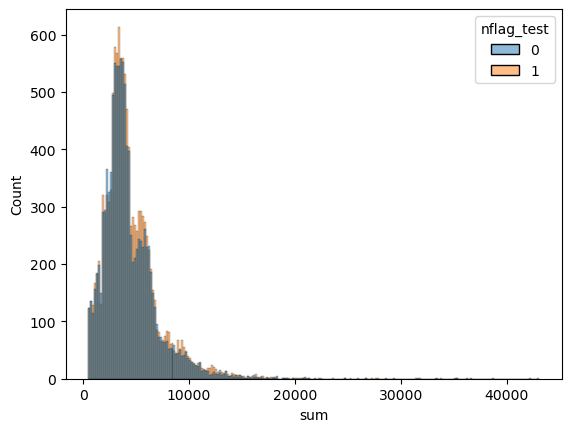

In [789]:
sns.histplot(df_paymentall[df_paymentall['sum']>0],x='sum',hue='nflag_test')


In [790]:
# Применим  функцию test_calc и сделаем вывод:сравниваем средние платежи и видим что среднее значение тестовой группы больше контрольной,  гипотеза H0 (нулевая гипотеза) о том, что средние значения рядов r1 и r2 равны, была отвергнута в пользу альтернативной гипотезы. Это означает, что существует статистически значимая разница в конверсии в платеж между двумя рядами данных

In [791]:
s_t, p_t = test_calc(df_paymentall[df_paymentall['nflag_test']==0]['sum'],df_paymentall[df_paymentall['nflag_test']==1]['sum'])

Гипотеза H0 не подтверждается: средние не равны
Среднее значение 1 ряда 2189.1884317754557
Среднее значение 2 ряда 2452.2773446201827
Разница средних =  -263.088912844727
P_value =  3.3214645838934018e-21


In [792]:
#  На основе теста Манна-Уитни можно утверждать, что суммы платежей в обеих группах (где 'nflag_test' равен 0) статистически не различаются, и их распределения могут считаться одинаковыми.

In [793]:
s_mw, p_mw = mann_whitney_func(df_paymentall[df_paymentall['nflag_test']==0]['sum'],df_paymentall[df_paymentall['nflag_test']==0]['sum'])

Распределения равны
P_value =  1.0


Сегментация результатов АБ Теста

In [794]:
for i in df_paymentall['city'].unique():

    print(i)

    s_w, p_w = mann_whitney_func(df_paymentall[(df_paymentall['nflag_test'] == 0) & (df_paymentall['city'] == i)]['sum'],

                         df_paymentall[(df_paymentall['nflag_test'] == 1) & (df_paymentall['city'] == i)]['sum'])

       

print()

Красноярск
Распределения равны
P_value =  0.8770469886251647
Мурманск
Распределения равны
P_value =  0.5434251528583327
Казань
Распределения равны
P_value =  0.37726004167062477
Санкт-Петербург
Распределения не равны
P_value =  2.0392184217953754e-20
Москва
Распределения не равны
P_value =  7.010591402203484e-16
Саратов
Распределения равны
P_value =  0.7833257779753139
Тольятти
Распределения равны
P_value =  0.22134177144014489
Тюмень
Распределения не равны
P_value =  0.038066216007540725
Волгоград
Распределения не равны
P_value =  0.03323940159324537
Сочи
Распределения равны
P_value =  0.05698257474271896
Владимир


Распределения не равны
P_value =  0.03166761411886426
Самара
Распределения не равны
P_value =  4.325201867794148e-30
Краснодар
Распределения равны
P_value =  0.05938101983441801
Сахалинск
Распределения равны
P_value =  0.19868569514015844
Дмитров
Распределения равны
P_value =  0.7422551789442879



In [795]:
#  Вывод:а основе теста Манна-Уитни можно утверждать вывод что,распределения не равны Волгограде,Тюмене,Москва,Санкт-Петербург в остальных городах  гипотеза H0 потверждется  распределения равны 

In [796]:
for i in df_paymentall['city'].unique():

    print(i)

    s_t, p_t = test_calc(df_paymentall[(df_paymentall['nflag_test'] == 0) & (df_paymentall['city'] == i)]['sum'],

                         df_paymentall[(df_paymentall['nflag_test'] == 1) & (df_paymentall['city'] == i)]['sum'])

       

print()

Красноярск
Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 2428.7775862068966
Среднее значение 2 ряда 2437.4958840961476
Разница средних =  -8.718297889251062
P_value =  0.9044823881233125
Мурманск
Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 1857.2197183098592
Среднее значение 2 ряда 1865.2710900473933
Разница средних =  -8.051371737534055
P_value =  0.9449762446327565
Казань
Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 2610.688397361273
Среднее значение 2 ряда 2731.9132
Разница средних =  -121.22480263872694
P_value =  0.286688049247618
Санкт-Петербург
Гипотеза H0 не подтверждается: средние не равны
Среднее значение 1 ряда 1913.5586377988272
Среднее значение 2 ряда 2427.462542182227
Разница средних =  -513.9039043833998
P_value =  2.3198088937974163e-18
Москва
Гипотеза H0 не подтверждается: средние не равны
Среднее значение 1 ряда 1986.18059125964
Среднее значение 2 ряда 2367.9590805347243
Разница средних =  -381.77848927508

Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 1743.376712328767
Среднее значение 2 ряда 2043.823076923077
Разница средних =  -300.4463645943099
P_value =  0.3550227648604757
Волгоград
Гипотеза H0 не подтверждается: средние не равны
Среднее значение 1 ряда 2601.7610241820767
Среднее значение 2 ряда 2288.8706240487063
Разница средних =  312.89040013337035
P_value =  0.03686899928098654
Сочи
Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 2523.081885856079
Среднее значение 2 ряда 2305.8304020100504
Разница средних =  217.2514838460288
P_value =  0.12297605685687812
Владимир
Гипотеза H0 не подтверждается: средние не равны
Среднее значение 1 ряда 2108.6101973684213
Среднее значение 2 ряда 2547.2200392927307
Разница средних =  -438.6098419243094
P_value =  0.010095112170351712
Самара
Гипотеза H0 не подтверждается: средние не равны
Среднее значение 1 ряда 1718.4172576832152
Среднее значение 2 ряда 3262.78927680798
Разница средних =  -1544.3720191247648
P_

In [797]:
# Вывод:на основе t-теста видим что гипотеза H0 не подтверждается в Москва и Санкт-Петербурге,в остальных городах средние равны 

Отчет по АБ Тесту

In [798]:
import numpy as np

df_final = pd.DataFrame()

for i in df_paymentall['city'].unique():
    for j in df_paymentall[df_paymentall['city'] == i]['id_trading_point'].unique():
        control = df_paymentall[(df_paymentall['nflag_test'] == 0) & (df_paymentall['id_trading_point'] == j)]['sum']
        test = df_paymentall[(df_paymentall['nflag_test'] == 1) & (df_paymentall['id_trading_point'] == j)]['sum']
       
        count_control = len(control)
        count_test = len(test)
        count_all = count_test + count_control
        
        sigma_control = np.std(control)
        sigma_test = np.std(test)

        avg_control = np.mean(control)
        avg_test = np.mean(test)

        diff = avg_test - avg_control
        
        s_a, p_a = test_calc(control,test)
       
        df_final = df_final.append({'city': i, 'id_trading_point': j,
                                    'count_test': count_test, 'count_control': count_control,
                                    'count_all': count_all, 'sigma_test': sigma_test, 'sigma_control': sigma_control,
                                    'avg_test': avg_test, 'avg_control': avg_control, 'diff': diff,
                                    'ttest_s': s_a,'pvalue_s':p_a}, ignore_index=True)

Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 2222.0521739130436
Среднее значение 2 ряда 2144.317032040472
Разница средних =  77.7351418725716
P_value =  0.6287709476405416
Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 2185.2147239263804
Среднее значение 2 ряда 2499.345794392523
Разница средних =  -314.1310704661428
P_value =  0.06901056074583502
Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 2730.378761061947
Среднее значение 2 ряда 2927.3411978221416
Разница средних =  -196.96243676019458
P_value =  0.24830826390447136
Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 2545.73487544484
Среднее значение 2 ряда 2404.106153846154
Разница средних =  141.62872159868584
P_value =  0.3808017001028424


C:\Users\Новый пользователь\AppData\Local\Temp\ipykernel_12504\3773594031.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_final = df_final.append({'city': i, 'id_trading_point': j,
C:\Users\Новый пользователь\AppData\Local\Temp\ipykernel_12504\3773594031.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_final = df_final.append({'city': i, 'id_trading_point': j,
C:\Users\Новый пользователь\AppData\Local\Temp\ipykernel_12504\3773594031.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_final = df_final.append({'city': i, 'id_trading_point': j,
C:\Users\Новый пользователь\AppData\Local\Temp\ipykernel_12504\3773594031.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas 

Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 2431.3653032440056
Среднее значение 2 ряда 2285.75
Разница средних =  145.61530324400564
P_value =  0.3264127897793312
Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 1688.5125
Среднее значение 2 ряда 1702.7140600315956
Разница средних =  -14.20156003159559
P_value =  0.922300518333421
Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 2111.272941176471
Среднее значение 2 ряда 2109.10663507109
Разница средних =  2.1663061053809542
P_value =  0.9910124894120407
Гипотеза H0 не подтверждается: средние не равны
Среднее значение 1 ряда 2452.986394557823
Среднее значение 2 ряда 3249.2814814814815
Разница средних =  -796.2950869236583
P_value =  0.024501004890271766


C:\Users\Новый пользователь\AppData\Local\Temp\ipykernel_12504\3773594031.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_final = df_final.append({'city': i, 'id_trading_point': j,
C:\Users\Новый пользователь\AppData\Local\Temp\ipykernel_12504\3773594031.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_final = df_final.append({'city': i, 'id_trading_point': j,
C:\Users\Новый пользователь\AppData\Local\Temp\ipykernel_12504\3773594031.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_final = df_final.append({'city': i, 'id_trading_point': j,
C:\Users\Новый пользователь\AppData\Local\Temp\ipykernel_12504\3773594031.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas 

Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 2574.3522267206476
Среднее значение 2 ряда 2422.286307053942
Разница средних =  152.06591966670567
P_value =  0.5524803558814528
Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 2496.9870466321245
Среднее значение 2 ряда 2259.6230366492146
Разница средних =  237.36400998290992
P_value =  0.3728909035918657
Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 2635.548076923077
Среднее значение 2 ряда 2621.4270557029176
Разница средних =  14.121021220159491
P_value =  0.9625274336266005
Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 2880.48427672956
Среднее значение 2 ряда 3237.200315457413
Разница средних =  -356.7160387278532
P_value =  0.1297970685161915


C:\Users\Новый пользователь\AppData\Local\Temp\ipykernel_12504\3773594031.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_final = df_final.append({'city': i, 'id_trading_point': j,
C:\Users\Новый пользователь\AppData\Local\Temp\ipykernel_12504\3773594031.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_final = df_final.append({'city': i, 'id_trading_point': j,
C:\Users\Новый пользователь\AppData\Local\Temp\ipykernel_12504\3773594031.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_final = df_final.append({'city': i, 'id_trading_point': j,
C:\Users\Новый пользователь\AppData\Local\Temp\ipykernel_12504\3773594031.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas 

Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 2400.6353276353275
Среднее значение 2 ряда 2481.9605633802817
Разница средних =  -81.32523574495417
P_value =  0.781042303541428
Гипотеза H0 не подтверждается: средние не равны
Среднее значение 1 ряда 1889.9237368922784
Среднее значение 2 ряда 2501.966228893058
Разница средних =  -612.0424920007797
P_value =  6.983206901274464e-07
Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 2218.636896046852
Среднее значение 2 ряда 2488.115030674847
Разница средних =  -269.4781346279947
P_value =  0.07683710303752554
Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 973.6235294117647
Среднее значение 2 ряда 1229.6442307692307
Разница средних =  -256.020701357466
P_value =  0.40375884675107376
Гипотеза H0 не подтверждается: средние не равны
Среднее значение 1 ряда 2352.2830188679245
Среднее значение 2 ряда 2925.1422222222222
Разница средних =  -572.8592033542977
P_value =  0.036305006065519056


C:\Users\Новый пользователь\AppData\Local\Temp\ipykernel_12504\3773594031.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_final = df_final.append({'city': i, 'id_trading_point': j,
C:\Users\Новый пользователь\AppData\Local\Temp\ipykernel_12504\3773594031.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_final = df_final.append({'city': i, 'id_trading_point': j,
C:\Users\Новый пользователь\AppData\Local\Temp\ipykernel_12504\3773594031.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_final = df_final.append({'city': i, 'id_trading_point': j,
C:\Users\Новый пользователь\AppData\Local\Temp\ipykernel_12504\3773594031.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas 

Гипотеза H0 не подтверждается: средние не равны
Среднее значение 1 ряда 1641.2125
Среднее значение 2 ряда 2929.045197740113
Разница средних =  -1287.832697740113
P_value =  7.29407411923071e-05
Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 1342.1293759512937
Среднее значение 2 ряда 1594.436507936508
Разница средних =  -252.30713198521426
P_value =  0.07628783375813585
Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 2392.8949579831933
Среднее значение 2 ряда 2706.2791666666667
Разница средних =  -313.3842086834734
P_value =  0.21988338416718506
Гипотеза H0 не подтверждается: средние не равны
Среднее значение 1 ряда 1689.791788856305
Среднее значение 2 ряда 2450.9910447761195
Разница средних =  -761.1992559198145
P_value =  0.00024525342392273575
Гипотеза H0 не подтверждается: средние не равны
Среднее значение 1 ряда 2050.6916524701874
Среднее значение 2 ряда 2582.2976
Разница средних =  -531.6059475298125
P_value =  0.0007003816631342835


C:\Users\Новый пользователь\AppData\Local\Temp\ipykernel_12504\3773594031.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_final = df_final.append({'city': i, 'id_trading_point': j,
C:\Users\Новый пользователь\AppData\Local\Temp\ipykernel_12504\3773594031.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_final = df_final.append({'city': i, 'id_trading_point': j,
C:\Users\Новый пользователь\AppData\Local\Temp\ipykernel_12504\3773594031.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_final = df_final.append({'city': i, 'id_trading_point': j,
C:\Users\Новый пользователь\AppData\Local\Temp\ipykernel_12504\3773594031.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas 

Гипотеза H0 не подтверждается: средние не равны
Среднее значение 1 ряда 2277.6117647058823
Среднее значение 2 ряда 2977.6293103448274
Разница средних =  -700.0175456389452
P_value =  0.006168215295010464
Гипотеза H0 не подтверждается: средние не равны
Среднее значение 1 ряда 1980.6586826347304
Среднее значение 2 ряда 2618.949685534591
Разница средних =  -638.2910028998606
P_value =  0.03346203684469195


C:\Users\Новый пользователь\AppData\Local\Temp\ipykernel_12504\3773594031.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_final = df_final.append({'city': i, 'id_trading_point': j,
C:\Users\Новый пользователь\AppData\Local\Temp\ipykernel_12504\3773594031.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_final = df_final.append({'city': i, 'id_trading_point': j,


Гипотеза H0 не подтверждается: средние не равны
Среднее значение 1 ряда 1972.8476793248944
Среднее значение 2 ряда 2506.616805983282
Разница средних =  -533.7691266583877
P_value =  2.005922423225886e-11
Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 1528.3251088534107
Среднее значение 2 ряда 1702.439577039275
Разница средних =  -174.11446818586433
P_value =  0.18197815948321544
Гипотеза H0 не подтверждается: средние не равны
Среднее значение 1 ряда 1394.6554621848738
Среднее значение 2 ряда 2128.556756756757
Разница средних =  -733.901294571883
P_value =  3.876566044301065e-05


C:\Users\Новый пользователь\AppData\Local\Temp\ipykernel_12504\3773594031.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_final = df_final.append({'city': i, 'id_trading_point': j,
C:\Users\Новый пользователь\AppData\Local\Temp\ipykernel_12504\3773594031.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_final = df_final.append({'city': i, 'id_trading_point': j,
C:\Users\Новый пользователь\AppData\Local\Temp\ipykernel_12504\3773594031.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_final = df_final.append({'city': i, 'id_trading_point': j,


Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 1639.8573248407642
Среднее значение 2 ряда 1602.9950062421972
Разница средних =  36.86231859856707
P_value =  0.7780070273603263
Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 1804.25
Среднее значение 2 ряда 1859.777027027027
Разница средних =  -55.52702702702709
P_value =  0.8663043555057068
Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 2739.3627204030226
Среднее значение 2 ряда 2813.1682464454975
Разница средних =  -73.80552604247487
P_value =  0.7119719350975426


C:\Users\Новый пользователь\AppData\Local\Temp\ipykernel_12504\3773594031.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_final = df_final.append({'city': i, 'id_trading_point': j,
C:\Users\Новый пользователь\AppData\Local\Temp\ipykernel_12504\3773594031.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_final = df_final.append({'city': i, 'id_trading_point': j,
C:\Users\Новый пользователь\AppData\Local\Temp\ipykernel_12504\3773594031.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_final = df_final.append({'city': i, 'id_trading_point': j,


Гипотеза H0 не подтверждается: средние не равны
Среднее значение 1 ряда 2507.8864516129033
Среднее значение 2 ряда 3132.301627033792
Разница средних =  -624.4151754208888
P_value =  6.050970845492351e-05
Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 1856.9444444444443
Среднее значение 2 ряда 1976.854961832061
Разница средних =  -119.91051738761666
P_value =  0.716046384232031
Гипотеза H0 не подтверждается: средние не равны
Среднее значение 1 ряда 1968.6934306569342
Среднее значение 2 ряда 1415.7843137254902
Разница средних =  552.909116931444
P_value =  0.034929468998951815
Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 2688.2302158273383
Среднее значение 2 ряда 2613.6835443037976
Разница средних =  74.54667152354068
P_value =  0.7815857297661141


C:\Users\Новый пользователь\AppData\Local\Temp\ipykernel_12504\3773594031.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_final = df_final.append({'city': i, 'id_trading_point': j,
C:\Users\Новый пользователь\AppData\Local\Temp\ipykernel_12504\3773594031.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_final = df_final.append({'city': i, 'id_trading_point': j,
C:\Users\Новый пользователь\AppData\Local\Temp\ipykernel_12504\3773594031.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_final = df_final.append({'city': i, 'id_trading_point': j,
C:\Users\Новый пользователь\AppData\Local\Temp\ipykernel_12504\3773594031.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas 

Гипотеза H0 не подтверждается: средние не равны
Среднее значение 1 ряда 1844.787234042553
Среднее значение 2 ряда 4121.753623188406
Разница средних =  -2276.966389145853
P_value =  1.1223868363766535e-09
Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 2511.9727272727273
Среднее значение 2 ряда 2517.3305687203792
Разница средних =  -5.357841447651936
P_value =  0.968450028951438
Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 2655.6724890829696
Среднее значение 2 ряда 2586.0118343195268
Разница средних =  69.66065476344284
P_value =  0.8079974055696059


C:\Users\Новый пользователь\AppData\Local\Temp\ipykernel_12504\3773594031.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_final = df_final.append({'city': i, 'id_trading_point': j,
C:\Users\Новый пользователь\AppData\Local\Temp\ipykernel_12504\3773594031.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_final = df_final.append({'city': i, 'id_trading_point': j,
C:\Users\Новый пользователь\AppData\Local\Temp\ipykernel_12504\3773594031.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_final = df_final.append({'city': i, 'id_trading_point': j,


Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 2439.4610778443116
Среднее значение 2 ряда 2902.4105263157894
Разница средних =  -462.9494484714778
P_value =  0.1333273246710206
Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 1743.376712328767
Среднее значение 2 ряда 2043.823076923077
Разница средних =  -300.4463645943099
P_value =  0.3550227648604757


C:\Users\Новый пользователь\AppData\Local\Temp\ipykernel_12504\3773594031.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_final = df_final.append({'city': i, 'id_trading_point': j,
C:\Users\Новый пользователь\AppData\Local\Temp\ipykernel_12504\3773594031.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_final = df_final.append({'city': i, 'id_trading_point': j,


Гипотеза H0 не подтверждается: средние не равны
Среднее значение 1 ряда 2601.7610241820767
Среднее значение 2 ряда 2288.8706240487063
Разница средних =  312.89040013337035
P_value =  0.03686899928098654
Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 2523.37558685446
Среднее значение 2 ряда 2371.4334975369457
Разница средних =  151.94208931751427
P_value =  0.3467675852041211
Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 2521.9580838323354
Среднее значение 2 ряда 2092.181818181818
Разница средних =  429.7762656505174
P_value =  0.13559014690618432


C:\Users\Новый пользователь\AppData\Local\Temp\ipykernel_12504\3773594031.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_final = df_final.append({'city': i, 'id_trading_point': j,
C:\Users\Новый пользователь\AppData\Local\Temp\ipykernel_12504\3773594031.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_final = df_final.append({'city': i, 'id_trading_point': j,
C:\Users\Новый пользователь\AppData\Local\Temp\ipykernel_12504\3773594031.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_final = df_final.append({'city': i, 'id_trading_point': j,


Гипотеза H0 не подтверждается: средние не равны
Среднее значение 1 ряда 2108.6101973684213
Среднее значение 2 ряда 2547.2200392927307
Разница средних =  -438.6098419243094
P_value =  0.010095112170351712
Гипотеза H0 не подтверждается: средние не равны
Среднее значение 1 ряда 2311.3875968992247
Среднее значение 2 ряда 4598.2198275862065
Разница средних =  -2286.832230686982
P_value =  7.222518974571453e-20
Гипотеза H0 не подтверждается: средние не равны
Среднее значение 1 ряда 1752.608695652174
Среднее значение 2 ряда 3104.5066666666667
Разница средних =  -1351.8979710144927
P_value =  1.1327785130388307e-07
Гипотеза H0 не подтверждается: средние не равны
Среднее значение 1 ряда 1508.8350515463917
Среднее значение 2 ряда 2762.2242990654204
Разница средних =  -1253.3892475190287
P_value =  2.1646756758588107e-06


C:\Users\Новый пользователь\AppData\Local\Temp\ipykernel_12504\3773594031.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_final = df_final.append({'city': i, 'id_trading_point': j,
C:\Users\Новый пользователь\AppData\Local\Temp\ipykernel_12504\3773594031.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_final = df_final.append({'city': i, 'id_trading_point': j,
C:\Users\Новый пользователь\AppData\Local\Temp\ipykernel_12504\3773594031.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_final = df_final.append({'city': i, 'id_trading_point': j,
C:\Users\Новый пользователь\AppData\Local\Temp\ipykernel_12504\3773594031.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas 

Гипотеза H0 не подтверждается: средние не равны
Среднее значение 1 ряда 860.418439716312
Среднее значение 2 ряда 1987.328244274809
Разница средних =  -1126.909804558497
P_value =  7.318758090993379e-05
Гипотеза H0 не подтверждается: средние не равны
Среднее значение 1 ряда 2523.5788262370543
Среднее значение 2 ряда 2176.003821656051
Разница средних =  347.5750045810032
P_value =  0.013358447618918195
Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 4163.959259259259
Среднее значение 2 ряда 4407.384937238494
Разница средних =  -243.42567797923493
P_value =  0.29422131648059047
Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 600.1538461538462
Среднее значение 2 ряда 1171.4533333333334
Разница средних =  -571.2994871794872
P_value =  0.10580921254927302
Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 483.4507042253521
Среднее значение 2 ряда 579.3333333333334
Разница средних =  -95.88262910798124
P_value =  0.7410763125801646


C:\Users\Новый пользователь\AppData\Local\Temp\ipykernel_12504\3773594031.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_final = df_final.append({'city': i, 'id_trading_point': j,
C:\Users\Новый пользователь\AppData\Local\Temp\ipykernel_12504\3773594031.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_final = df_final.append({'city': i, 'id_trading_point': j,
C:\Users\Новый пользователь\AppData\Local\Temp\ipykernel_12504\3773594031.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_final = df_final.append({'city': i, 'id_trading_point': j,
C:\Users\Новый пользователь\AppData\Local\Temp\ipykernel_12504\3773594031.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas 

In [799]:
# Считаем percent_count и и делим на лейблы 

In [800]:
df_final['percent_count']=(df_final['count_all']/df_final['count_all'].sum())

df_final['flag_diff'] = np.where((df_final['pvalue_s'] < .05) & (df_final['diff'] > 0), 'Positive',
                                 np.where((df_final['pvalue_s'] < .05) & (df_final['diff'] < 0), 'Negative', 'N'))

df_final

,city,id_trading_point,count_test,count_control,count_all,sigma_test,sigma_control,avg_test,avg_control,diff,ttest_s,pvalue_s,percent_count,flag_diff
0,Красноярск,212,593,575,1168,2706.303959,2782.693356,2144.317032,2222.052174,-77.735142,0.483585,6.287709e-01,0.025773,N
1,Красноярск,278,535,489,1024,2913.268825,2572.281412,2499.345794,2185.214724,314.131070,-1.820268,6.901056e-02,0.022596,N
2,Красноярск,202,551,565,1116,2954.002005,2735.461804,2927.341198,2730.378761,196.962437,-1.155073,2.483083e-01,0.024626,N
3,Красноярск,444,650,562,1212,2808.665479,2794.649098,2404.106154,2545.734875,-141.628722,0.876740,3.808017e-01,0.026744,N
4,Красноярск,277,708,709,1417,2710.761468,2866.563873,2285.750000,2431.365303,-145.615303,0.981705,3.264128e-01,0.031268,N
5,Мурманск,54,633,640,1273,2563.105468,2625.958553,1702.714060,1688.512500,14.201560,-0.097556,9.223005e-01,0.028090,N
6,Мурманск,55,422,425,847,2787.684560,2800.922159,2109.106635,2111.272941,-2.166306,0.011268,9.910125e-01,0.018690,N
7,Казань,991,270,294,564,4710.844507,3627.750431,3249.281481,2452.986395,796.295087,-2.255258,2.450100e-02,0.012445,Positive
8,Казань,699,482,494,976,3902.763078,4078.716822,2422.286307,2574.352227,-152.065920,0.594254,5.524804e-01,0.021537,N
9,Казань,477,382,386,768,3478.284407,3876.962967,2259.623037,2496.987047,-237.364010,0.891593,3.728909e-01,0.016947,N


In [801]:
# Выгружаем в эксель

In [802]:
writer=pd.ExcelWriter('Калькулятор АБ теста .xlsx')

df_final[df_final['flag_diff']=='Positive'].to_excel(writer,sheet_name='Успешные',index=False)
df_final[df_final['flag_diff']=='Negative'].to_excel(writer,sheet_name='Неуспешные',index=False)
df_final[df_final['flag_diff']=='N'].to_excel(writer,sheet_name='no diff',index=False)

writer.close()

